In [1]:
## Ses İşleme ve Audio Analizi için Gerekli Kütüphanelerin Import Edilmesi

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle
import os
from tqdm import tqdm
import math


sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

In [3]:
len(audio_files)

1440

In [ ]:
ipd.Audio(audio_files[20])

In [5]:
## Ses Dosyasını Librosa ile Yükleme

librosa.load(audio_files[1])

(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.2893084e-06,  1.0079405e-06, -7.8646383e-07], dtype=float32),
 22050)

In [6]:
y,sr = librosa.load(audio_files[0])
print(f'y: {y[:5]}') 
print(f'shape y: {y.shape}') 
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0.]
shape y: (77988,)
sr: 22050


In [7]:
y

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        3.3473766e-06, -1.9576355e-06,  1.3353035e-06], dtype=float32)

In [8]:
sr

22050

In [ ]:
pd.Series(y)

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
77983   -0.000037
77984   -0.000010
77985    0.000003
77986   -0.000002
77987    0.000001
Length: 77988, dtype: float32

<Axes: title={'center': 'Raw Audio Example'}>

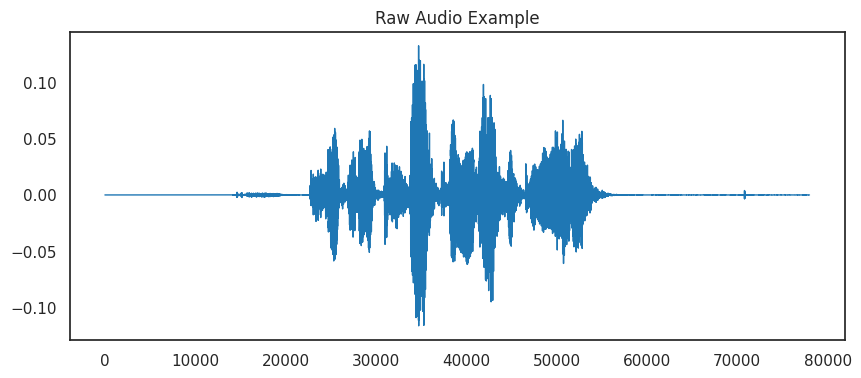

In [ ]:
## Ham Ses Sinyalinin Görselleştirilmesi

pd.Series(y).plot(figsize=(10,4), 
                  linewidth = 1,
                  title = "Raw Audio Example",
                  color = color_pal[0])

<Axes: title={'center': 'Raw Audio Trimmed Example'}>

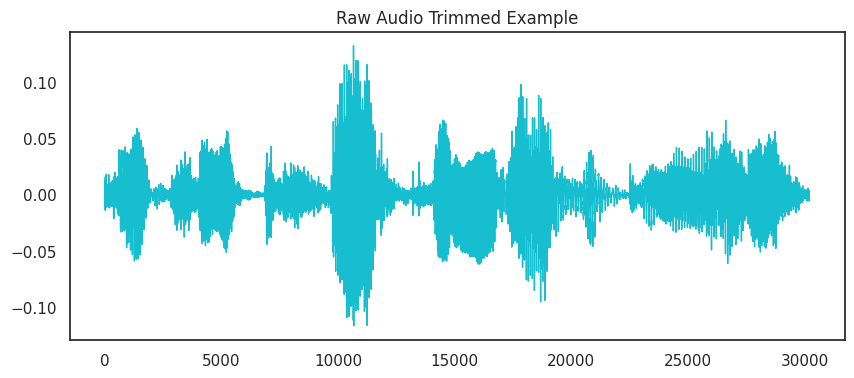

In [ ]:
## Ses Sinyalinden Sessiz Bölümlerin Temizlenmesi

y_trimmed, _ = librosa.effects.trim(y, top_db = 15)
pd.Series(y_trimmed).plot(figsize=(10,4), 
                  linewidth = 1,
                  title = "Raw Audio Trimmed Example",
                  color = color_pal[9])

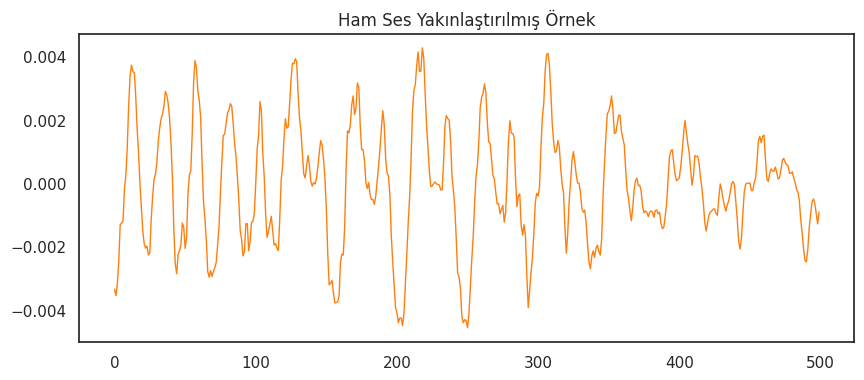

In [ ]:
## Ses Sinyalinin Yakınlaştırılmış Bölümünün Görselleştirilmesi

pd.Series(y[30000:30500]).plot(figsize=(10, 4),
                  lw=1,
                  title='Ham Ses Yakınlaştırılmış Örnek',
                 color=color_pal[1])
plt.show()

In [ ]:
## Ses Sinyalinin Kısa-Zaman Fourier Dönüşümü (STFT) ve Spektrogram Hesaplama

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 153)

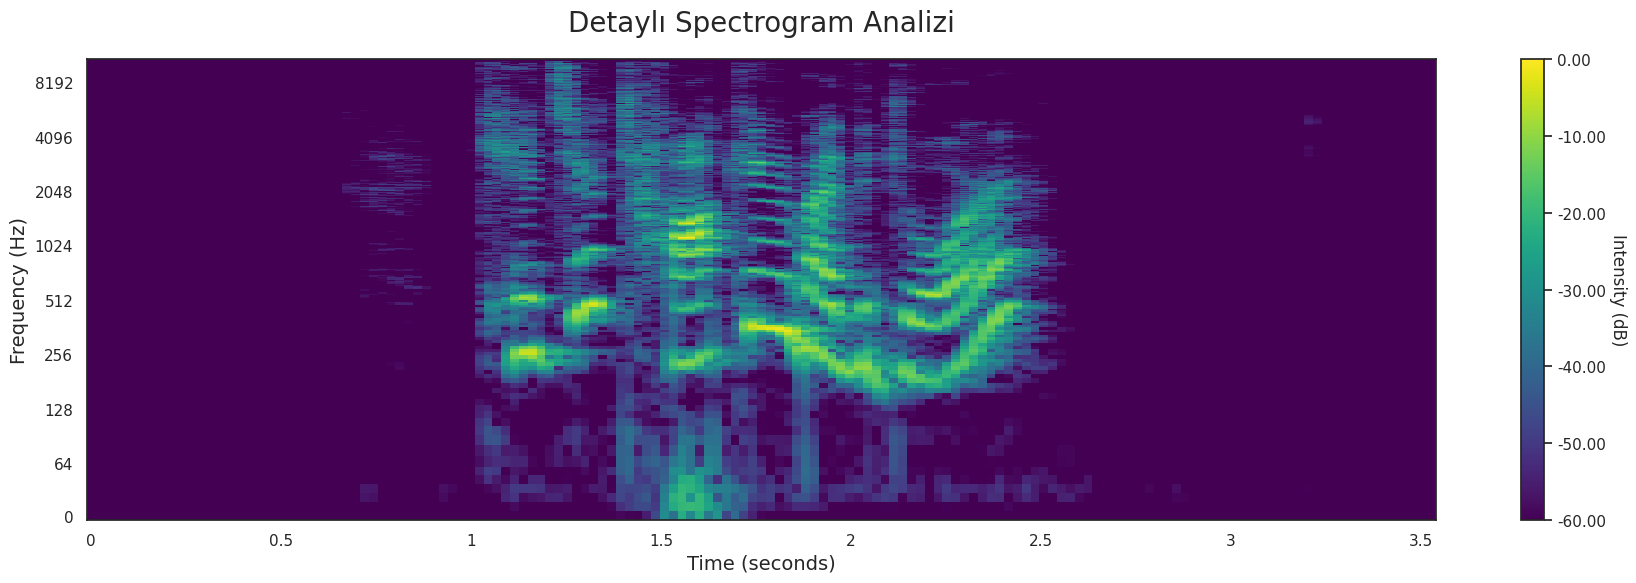

In [ ]:
## Detaylı Spektrogram Görselleştirmesi

fig, ax = plt.subplots(figsize=(18, 6))  

img = librosa.display.specshow(S_db,
    x_axis='time',
    y_axis='log',
    ax=ax,
    cmap='viridis',
    hop_length=512,
    vmin=-60,
    vmax=0)

ax.set_title('Detaylı Spectrogram Analizi', fontsize=20, pad=20)
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Frequency (Hz)', fontsize=14)

# Colorbar'ı iyileştirme
cbar = fig.colorbar(img, ax=ax, format='%0.2f')
cbar.set_label('Intensity (dB)', rotation=270, labelpad=15)

# Grid ekleme
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
## Mel Spektrogram Hesaplama

S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

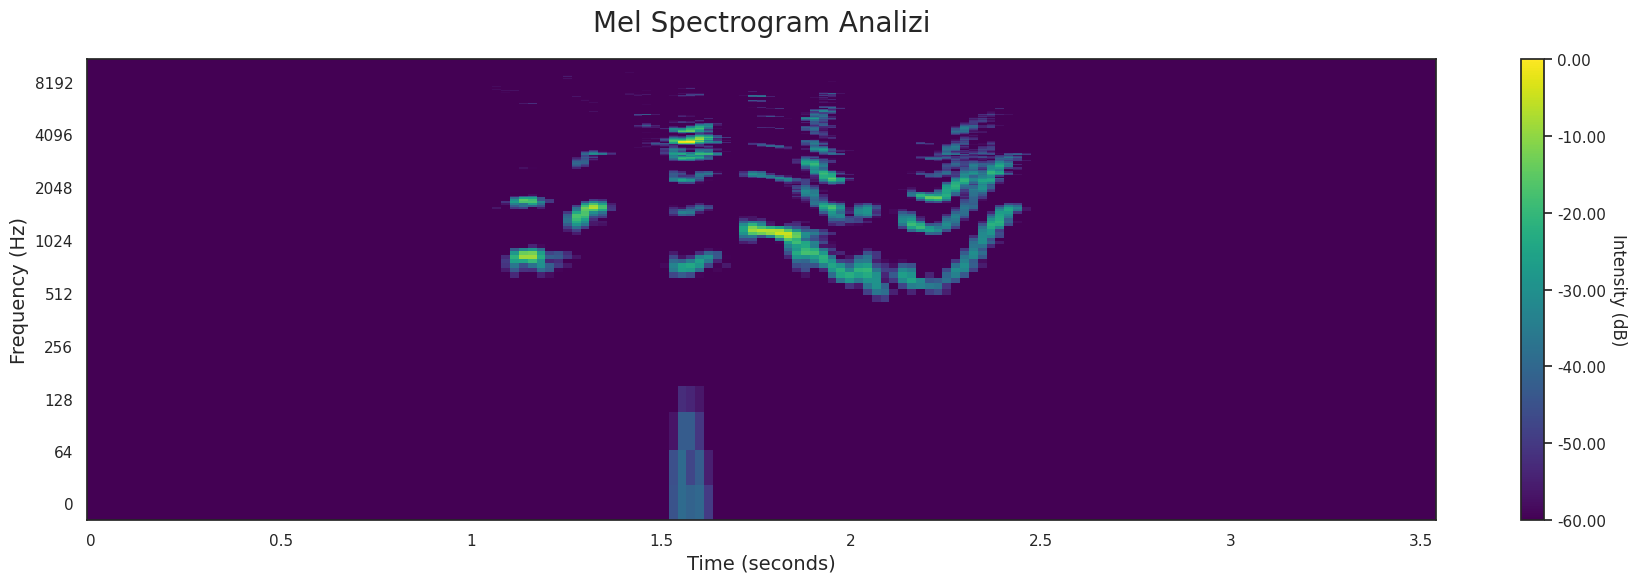

In [ ]:
## Mel Spektrogram Görselleştirmesi

fig, ax = plt.subplots(figsize=(18, 6))  

img = librosa.display.specshow(S_db_mel,
    x_axis='time',
    y_axis='log',
    ax=ax,
    cmap='viridis',
    hop_length=512,
    vmin=-60,
    vmax=0)

ax.set_title('Mel Spectrogram Analizi', fontsize=20, pad=20)
ax.set_xlabel('Time (seconds)', fontsize=14)
ax.set_ylabel('Frequency (Hz)', fontsize=14)

# Colorbar'ı iyileştirme
cbar = fig.colorbar(img, ax=ax, format='%0.2f')
cbar.set_label('Intensity (dB)', rotation=270, labelpad=15)

# Grid ekleme
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [ ]:
## RAVDESS Duygusal Konuşma Veri Setini Yükleme ve İşleme

# wav dosyalarını oku (liste halinde)
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

file_emotion = []
file_path = []

for f in audio_files:
    fname = os.path.basename(f)          # sadece dosya adını al
    part = fname.split('.')[0].split('-')
    file_emotion.append(int(part[2]))    # 3. parça emotion kodu
    file_path.append(f)


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
audio_df = pd.concat([emotion_df, path_df], axis=1)


audio_df.Emotions.replace({
    1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}, inplace=True)

print(audio_df.Emotions.value_counts())


Emotions
neutral     288
surprise    192
disgust     192
fear        192
sad         192
happy       192
angry       192
Name: count, dtype: int64


Text(0.5, 0, '')

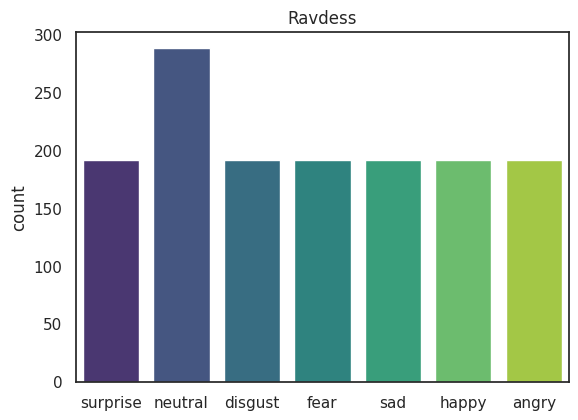

In [ ]:
## Düzeltilmiş RAVDESS Duygu Dağılımı Görselleştirmesi

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.countplot(audio_df , x = audio_df ['Emotions'], palette='viridis')
plt.title('Ravdess')
plt.xlabel('')

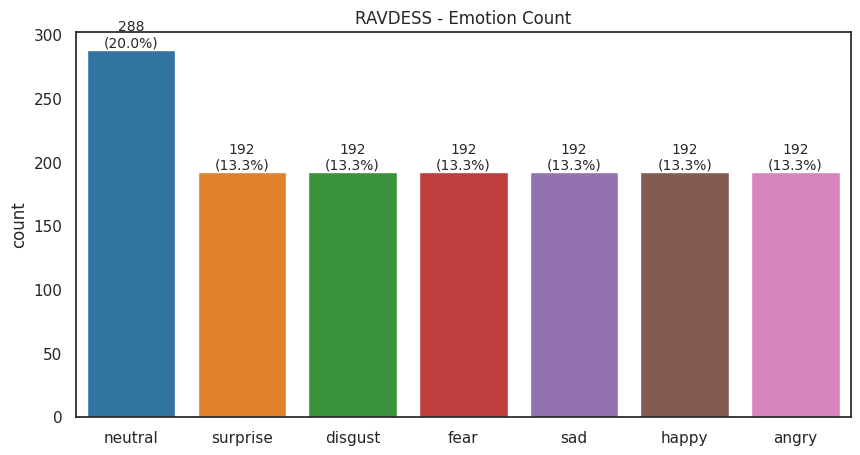

In [ ]:
## RAVDESS Duygu Dağılımı ve Yüzde Etiketli Görselleştirme

plt.figure(figsize=(10,5))
ax = sns.countplot(data=audio_df, x='Emotions', order=audio_df['Emotions'].value_counts().index)
plt.title("RAVDESS - Emotion Count")
plt.xlabel("")
# yüzde etiketleri
total = len(audio_df)
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}\n({count/total:.1%})', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.show()


In [ ]:
## Ses Dosyalarından Özellik Çıkarma Fonksiyonu ve Veri Birleştirme


def extract_features(file_list, sr=22050, n_mfcc=13):
    features = []
    for fp in tqdm(file_list, desc="Extract features"):
        try:
            y, _ = librosa.load(fp, sr=sr)
            # temel özetler
            duration = librosa.get_duration(y=y, sr=sr)
            rms = float(np.mean(librosa.feature.rms(y=y)))
            zcr = float(np.mean(librosa.feature.zero_crossing_rate(y)))
            spec_cent = float(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)))
            spec_roll = float(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)))
            # MFCC'ler (ortalama)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
            mfcc_means = np.mean(mfcc, axis=1)  # n_mfcc uzunluğunda
            row = {
                'Path': fp,
                'Duration': duration,
                'RMS': rms,
                'ZCR': zcr,
                'SpecCentroid': spec_cent,
                'SpecRolloff': spec_roll
            }
        
            for i, m in enumerate(mfcc_means, 1):
                row[f'MFCC{i}'] = m
            features.append(row)
        except Exception as e:
            print("Error:", fp, e)
    return pd.DataFrame(features)


file_list = audio_df['Path'].tolist()   # senin dataframe'den
feat_df = extract_features(file_list)

combined_df = audio_df.merge(feat_df, on='Path')
combined_df.head()


Extract features: 100%|██████████| 1440/1440 [01:21<00:00, 17.63it/s]


,Emotions,Path,Duration,RMS,ZCR,SpecCentroid,SpecRolloff,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13
0,surprise,../input/ravdess-emotional-speech-audio/Actor_...,3.536871,0.006981,0.235687,2690.881506,5052.702780,-578.057007,38.450909,-14.525623,10.058562,-7.268931,-7.338440,-3.074346,-5.954074,-3.085561,-3.633329,-4.091269,-4.767272,-3.258367
1,neutral,../input/ravdess-emotional-speech-audio/Actor_...,3.636961,0.003616,0.270194,2564.471057,4858.617542,-650.710876,54.477310,-9.090126,8.411754,-4.387534,-3.765707,-5.362751,-8.610381,-3.971552,-0.895974,-4.721406,-1.995388,-5.056730
2,disgust,../input/ravdess-emotional-speech-audio/Actor_...,4.137460,0.005993,0.269719,3317.772226,6037.356789,-574.171631,45.985577,-12.048973,5.837510,-11.664725,-2.112240,-5.376717,-11.543212,-5.600093,0.080802,-5.487411,-2.752090,-6.636899
3,disgust,../input/ravdess-emotional-speech-audio/Actor_...,3.637007,0.003035,0.217895,2504.610864,4672.842232,-644.401794,57.697067,-13.365278,9.040555,-9.703859,-0.132379,-8.262967,-13.345395,-6.544706,0.045264,-6.350311,-2.791578,-7.690273
4,neutral,../input/ravdess-emotional-speech-audio/Actor_...,3.770431,0.005332,0.328973,3380.163845,6144.162643,-622.578674,51.311447,-10.439537,4.765820,-4.809168,-3.219576,-5.721810,-9.393638,-5.245095,-1.987432,-5.037799,-2.868663,-6.420317


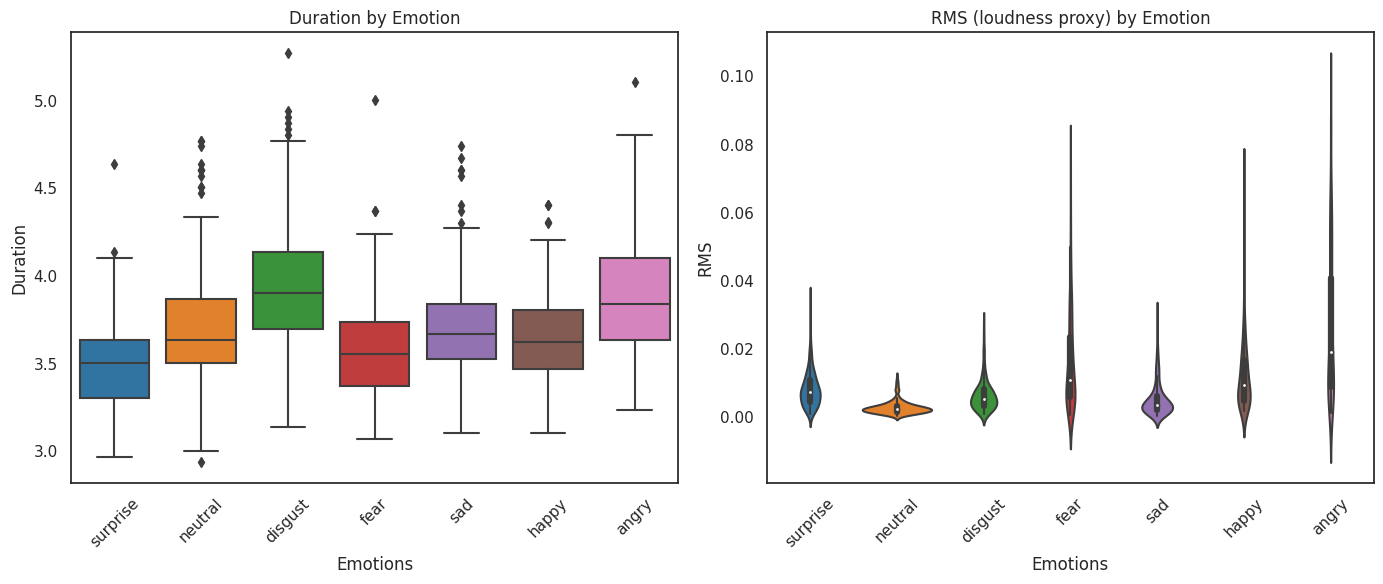

In [ ]:
## Duygulara Göre Ses Özelliklerinin Karşılaştırmalı Analizi

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(data=combined_df, x='Emotions', y='Duration')
plt.title("Duration by Emotion")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.violinplot(data=combined_df, x='Emotions', y='RMS')
plt.title("RMS (loudness proxy) by Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


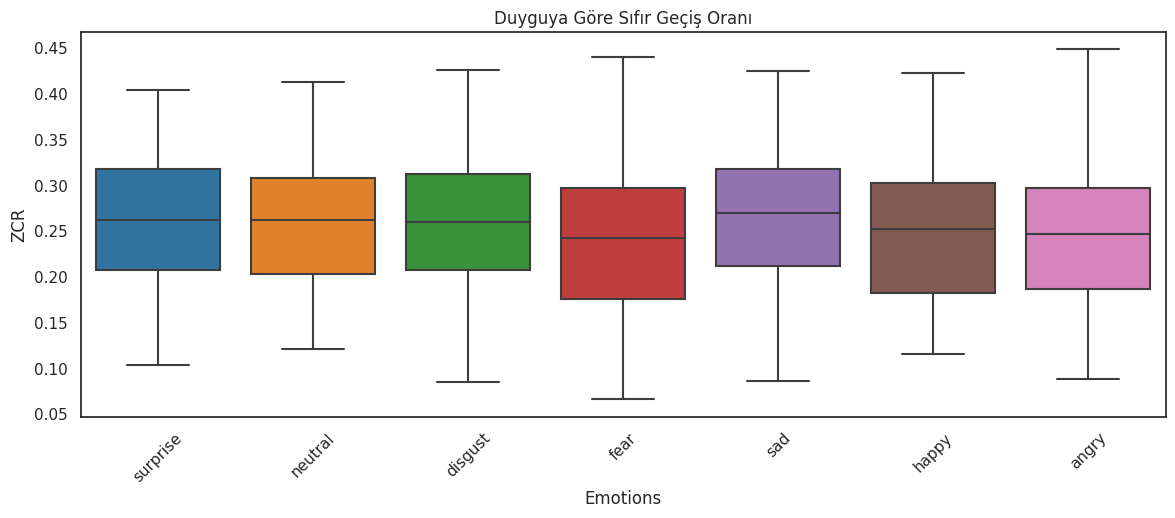

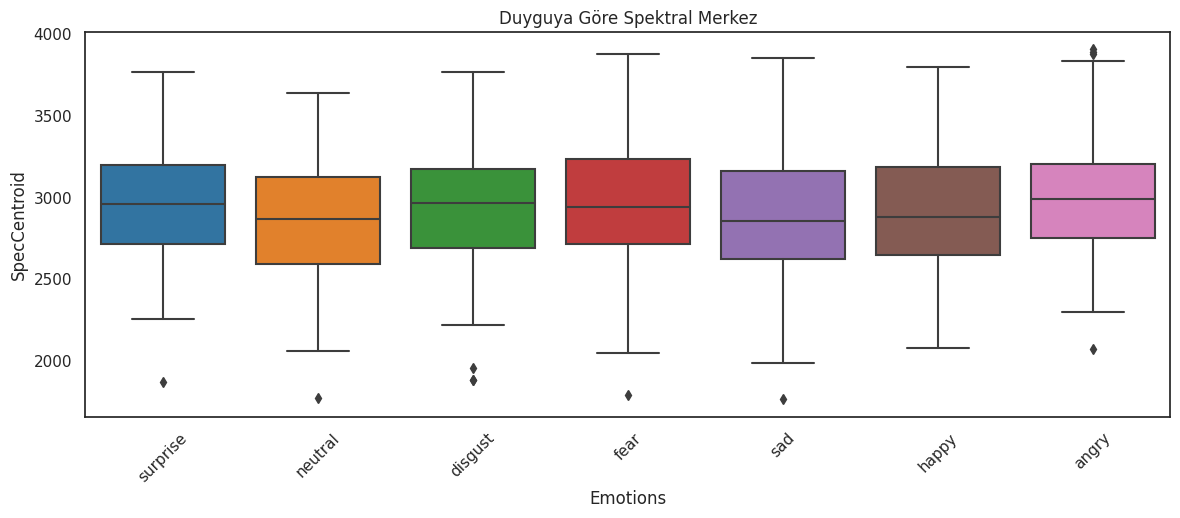

In [28]:
## Sıfır Geçiş Oranı ve Spektral Merkezin Duygulara Göre Dağılımı

plt.figure(figsize=(14,5))
sns.boxplot(data=combined_df, x='Emotions', y='ZCR')
plt.title("Duyguya Göre Sıfır Geçiş Oranı")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14,5))
sns.boxplot(data=combined_df, x='Emotions', y='SpecCentroid')
plt.title("Duyguya Göre Spektral Merkez")
plt.xticks(rotation=45)
plt.show()


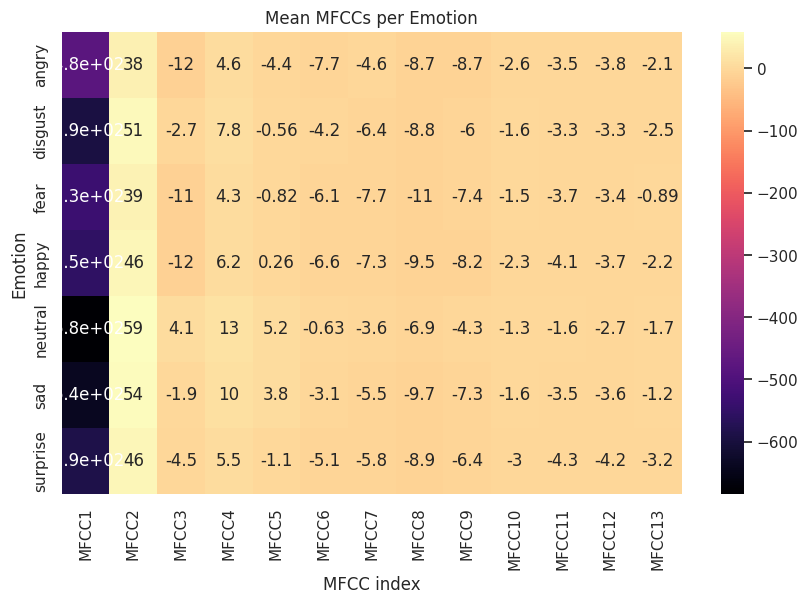

In [ ]:
## Duygulara Göre Ortalama MFCC Değerleri Isı Haritası

mfcc_cols = [c for c in combined_df.columns if c.startswith('MFCC')]
mfcc_mean_by_emotion = combined_df.groupby('Emotions')[mfcc_cols].mean()

plt.figure(figsize=(10,6))
sns.heatmap(mfcc_mean_by_emotion, annot=True, cmap='magma')
plt.title("Mean MFCCs per Emotion")
plt.xlabel("MFCC index")
plt.ylabel("Emotion")
plt.show()


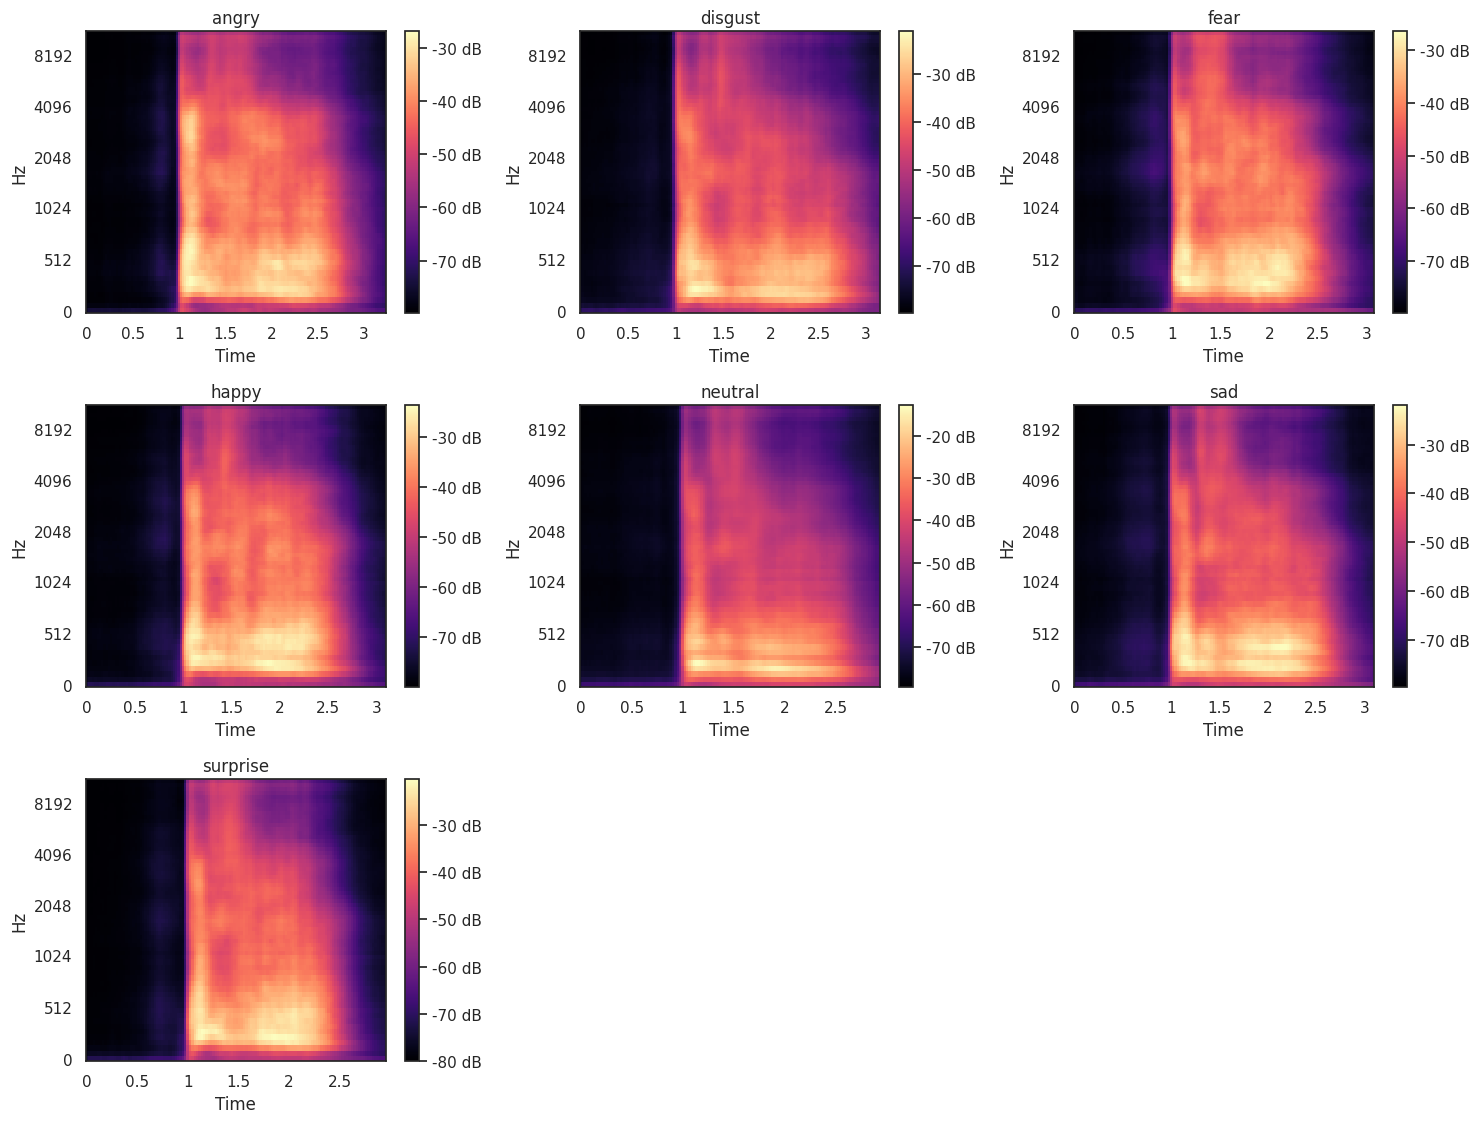

In [ ]:
## Duygulara Göre Ortalama Mel Spektrogramlarının Karşılaştırmalı Analizi

def mean_mel_for_emotion(df, emotion, sr=22050, n_mels=64):
    paths = df[df['Emotions']==emotion]['Path'].tolist()
    mel_list = []
    for p in paths:
        y, _ = librosa.load(p, sr=sr)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        S_db = librosa.power_to_db(S, ref=np.max)
        mel_list.append(S_db)
    # pad to same shape (time dim farklı olabilir) -> resize by taking mean along time axis after trimming/pad
    # simplest: average along frequency-time by aligning on min time frames
    min_frames = min(m.shape[1] for m in mel_list)
    mel_trunc = np.array([m[:, :min_frames] for m in mel_list])
    return np.mean(mel_trunc, axis=0)

emotions = combined_df['Emotions'].unique()
n = len(emotions)
cols = 3
rows = int(np.ceil(n/cols))
plt.figure(figsize=(cols*5, rows*3.8))
for i, em in enumerate(sorted(emotions)):
    mean_mel = mean_mel_for_emotion(combined_df, em, n_mels=64)
    plt.subplot(rows, cols, i+1)
    librosa.display.specshow(mean_mel, x_axis='time', y_axis='mel')
    plt.title(em)
    plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


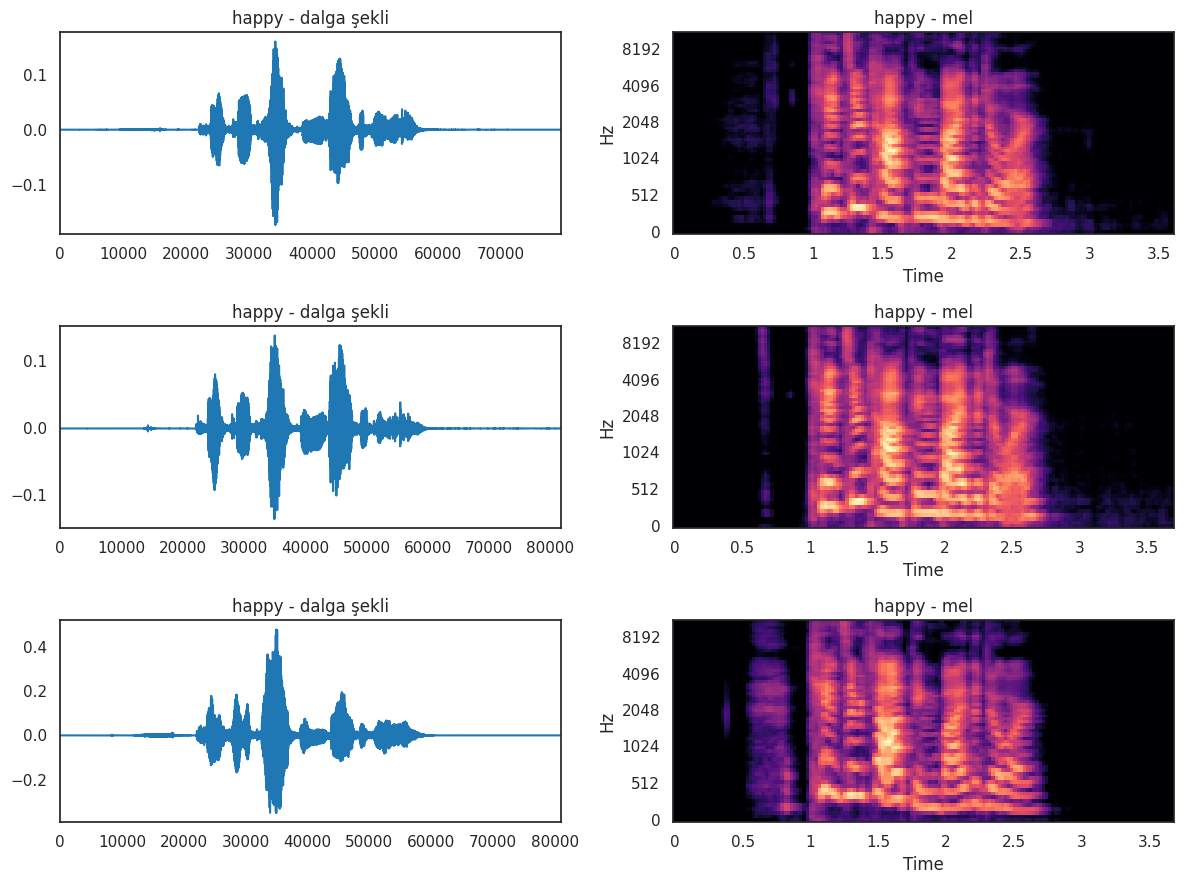

In [29]:
## Belirli Bir Duygu İçin Ses Örneklerini Dalga Formu ve Mel Spektrogramı ile Görselleştirme

def plot_examples_by_emotion(df, emotion, n_examples=3, sr=22050):
    paths = df[df['Emotions']==emotion]['Path'].tolist()[:n_examples]
    plt.figure(figsize=(12, 3*n_examples))
    for i, p in enumerate(paths):
        y, _ = librosa.load(p, sr=sr)
        plt.subplot(n_examples, 2, 2*i+1)
        plt.title(f"{emotion} - dalga şekli")
        plt.plot(y)
        plt.xlim(0, len(y))
        plt.subplot(n_examples, 2, 2*i+2)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
        S_db = librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(S_db, x_axis='time', y_axis='mel')
        plt.title(f"{emotion} - mel")
    plt.tight_layout()
    plt.show()

# Örnek: happy için 3 örnek
plot_examples_by_emotion(combined_df, 'happy', n_examples=3)
